C:\Users\HP\AppData\Local\Temp\ipykernel_20360\3057725885.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


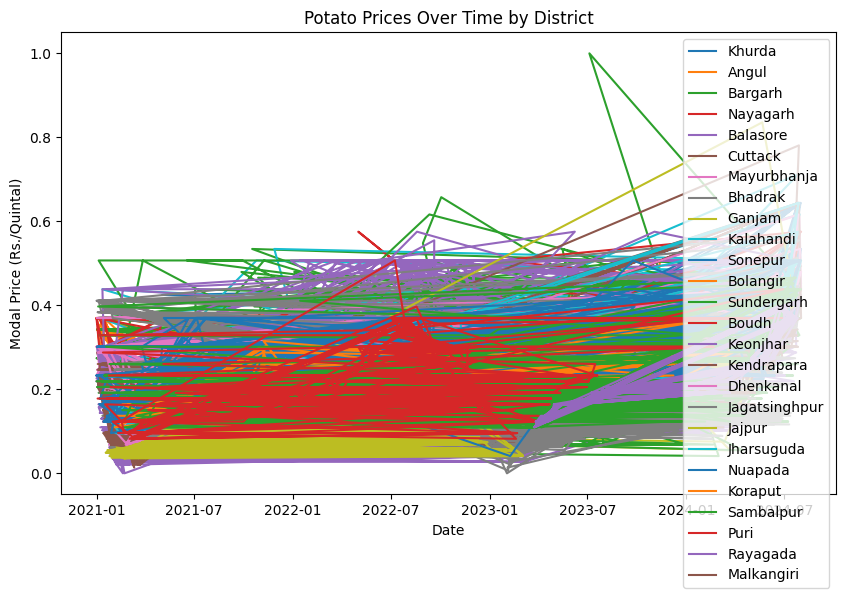

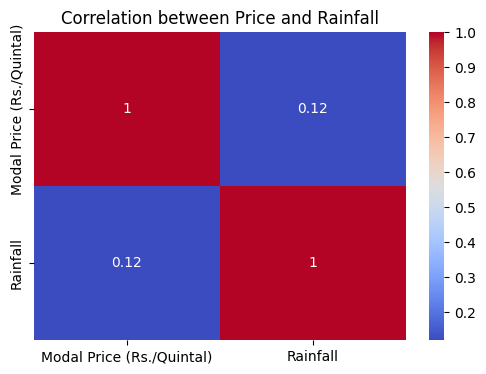

              Modal Price (Rs./Quintal)                                \
                                  count      mean       std       min   
District Name                                                           
Angul                            1203.0  0.226580  0.063900  0.068493   
Balasore                         2145.0  0.137259  0.060299  0.000000   
Bargarh                          2327.0  0.233468  0.085216  0.027397   
Bhadrak                          1985.0  0.182938  0.073995  0.034247   
Bolangir                         1036.0  0.242794  0.062419  0.150685   
Boudh                             806.0  0.233828  0.072442  0.082192   
Cuttack                           324.0  0.153480  0.065215  0.013699   
Dhenkanal                        3256.0  0.227605  0.074241  0.068493   
Ganjam                           1487.0  0.203141  0.069441  0.054795   
Jagatsinghpur                    1216.0  0.176096  0.075354  0.000000   
Jajpur                            415.0  0.133996  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('cleaned_data.csv')

# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Plot time series of modal prices for each district
plt.figure(figsize=(10, 6))
for district in df['District Name'].unique():
    district_data = df[df['District Name'] == district]
    plt.plot(district_data['Date'], district_data['Modal Price (Rs./Quintal)'], label=district)

plt.title('Potato Prices Over Time by District')
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.legend()
plt.show()

# Correlation heatmap between price and rainfall
plt.figure(figsize=(6, 4))
sns.heatmap(df[['Modal Price (Rs./Quintal)', 'Rainfall']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Price and Rainfall')
plt.show()

# Statistical summary for each district
print(df.groupby('District Name')[['Modal Price (Rs./Quintal)', 'Rainfall']].describe())


In [ ]:
# Create lag features (e.g., previous day's price)
df['Price_Lag_1'] = df.groupby('District Name')['Modal Price (Rs./Quintal)'].shift(1)

# Create a rolling average feature (e.g., 7-day rolling average of prices)
df['Price_Rolling_7'] = df.groupby('District Name')['Modal Price (Rs./Quintal)'].rolling(window=7).mean().reset_index(0, drop=True)

# Create cumulative rainfall feature
df['Cumulative_Rainfall'] = df.groupby('District Name')['Rainfall'].cumsum()

# Drop any rows with NaN values created by lag/rolling features
df = df.dropna()

# Save the updated DataFrame with new features
df.to_csv('engineered_data.csv', index=False)


print(df.head())


   District Name  Modal Price (Rs./Quintal)  Rainfall       Date  Price_Lag_1  \
9          Angul                    0.09589     4.400 2021-03-14     0.287671   
10         Angul                    0.09589     4.400 2021-03-07     0.095890   
11         Angul                    0.09589     4.400 2021-03-16     0.095890   
12         Angul                    0.09589     0.625 2021-02-23     0.095890   
13         Angul                    0.09589     4.400 2021-03-24     0.095890   

    Price_Rolling_7  Cumulative_Rainfall  
9          0.180039             746.1625  
10         0.180039             750.5625  
11         0.172211             754.9625  
12         0.160470             755.5875  
13         0.146771             759.9875  


In [ ]:
import pandas as pd


df = pd.read_csv('engineered_data.csv')


if 'Cumulative_Rainfall' in df.columns:
    df = df.drop(columns=['Cumulative_Rainfall'])


df['Date'] = pd.to_datetime(df['Date'])


df['Rainfall_7_Day_Cumulative'] = df.groupby('District Name')['Rainfall'].rolling(window=7, min_periods=1).sum().reset_index(0, drop=True)


df = df.dropna()


df.to_csv('updated_engineered_data.csv', index=False)


print(df.head())


  District Name  Modal Price (Rs./Quintal)  Rainfall       Date  Price_Lag_1  \
0         Angul                    0.09589     4.400 2021-03-14     0.287671   
1         Angul                    0.09589     4.400 2021-03-07     0.095890   
2         Angul                    0.09589     4.400 2021-03-16     0.095890   
3         Angul                    0.09589     0.625 2021-02-23     0.095890   
4         Angul                    0.09589     4.400 2021-03-24     0.095890   

   Price_Rolling_7  Rainfall_7_Day_Cumulative  
0         0.180039                      4.400  
1         0.180039                      8.800  
2         0.172211                     13.200  
3         0.160470                     13.825  
4         0.146771                     18.225  


In [4]:
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv('updated_engineered_data.csv')

profile = ProfileReport(df, title="Profiling Report")
profile.to_file("report2.html")

print("Report saved as report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Report saved as report.html


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'Final.xlsx'
data = pd.read_excel(file_path)

# Feature Engineering

# 1. Time-Based Features
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Weekday'] = data['Date'].dt.weekday
data['Quarter'] = data['Date'].dt.quarter

# 2. Encoding Categorical Variables
label_encoder = LabelEncoder()
data['District Name'] = label_encoder.fit_transform(data['District Name'])

# 3. Interaction Features
# For example, interaction between 'Fertilizer' and 'Rainfall'
data['Fertilizer_Rainfall_Interaction'] = data['Fertilizer'] * data['Rainfall']

# 4. Lag Features (assuming it's a time series data)
# Creating a lag feature for price (previous month's price)
data['Lag_Price'] = data['Modal Price (Rs./Quintal)'].shift(1)

# 5. Aggregation Features
# Aggregating monthly average price by district
monthly_avg_price = data.groupby(['District Name', 'Year', 'Month'])['Modal Price (Rs./Quintal)'].mean().reset_index()
monthly_avg_price.rename(columns={'Modal Price (Rs./Quintal)': 'Monthly_Avg_Price'}, inplace=True)
data = pd.merge(data, monthly_avg_price, on=['District Name', 'Year', 'Month'], how='left')

# 6. Rolling/Aggregate features for rainfall
data['Rolling_Rainfall'] = data['Rainfall'].rolling(window=3).mean()

# Drop rows with NaN values generated by lag features
data.dropna(inplace=True)

# Save the engineered data to a new file
engineered_file_path = 'engineered_data_final.csv'
data.to_csv(engineered_file_path, index=False)
print(f"Engineered data saved to {engineered_file_path}")


C:\Users\HP\AppData\Local\Temp\ipykernel_14500\541833069.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Engineered data saved to engineered_data_final.csv


In [ ]:
import pandas as pd

file_path = 'engineered_data_final.csv'  
data = pd.read_csv(file_path)


data_cleaned = data.dropna()

# Sort the data by Month, Day, and Year
data_sorted_correctly = data_cleaned.sort_values(by=['Month', 'Day', 'Year'])

# Save the correctly sorted data to a new CSV file
output_path_corrected = 'correctly_sorted_data.csv'  # Replace with the desired output file path
data_sorted_correctly.to_csv(output_path_corrected, index=False)

print(f"Data has been cleaned and sorted. The sorted file is saved at {output_path_corrected}")

Data has been cleaned and sorted. The sorted file is saved at correctly_sorted_data.csv
